# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement
### Robert Miller

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [194]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.model_selection import GridSearchCV

## Loading the dataset

In [195]:
# read data into a dataframe using read_csv
df = pd.read_csv('datasets/Loan_Modeling.csv')

## Data Overview

* Observations
    * There are 5000 rows and 14 columns
    * Data types are numerical
        * It won't be necessary to convert data types
        * It may be necessary to understand outliers
        * It may be necessary to understand correlations between features
    * Info() indicates there are 0 non-null values
    * Customer ID can be dropped
* Sanity checks
    * Sanity checks are run against features to determine if values are zero
    * Based on observations there are 0 null values so some initial sanity checks are required
    * No customers have Age == 0
    

In [196]:
# run head() to observe the first 5 rows
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [197]:
# run shape to understand count of rows and columns
print(f"Rows: {df.shape[0]} Columns: {df.shape[1]}\n")

# Run info to understand if there are null or missing values
df.info()
   

# Check some value counts of a few features: CreditCard
print(f"\nCreditCard value counts: {df.CreditCard.value_counts()}\n")

# Check some value counts of a few features: Personal_Loan
print(f"\nPersonal Loan value counts: {df.Personal_Loan.value_counts()}\n")

# Check some value counts of a few features: Family
print(f"\nFamily Size value counts: {df.Family.value_counts()}\n")

# Check some value counts of a few features: Education
print(f"\nEducation value counts: {df.Education.value_counts()}\n")

# Check some value counts of a few features: Securities_Account
print(f"\nSecurity Account value counts: {df.Securities_Account.value_counts()}\n")

# Check some value counts of a few features: CD_Account
print(f"\nCD_Account value counts: {df.CD_Account.value_counts()}\n")

# Check some value counts of a few features: Online
print(f"\nOnline value counts: {df.Online.value_counts()}\n")

# Check number of customers with CC spending vs customers w/o CC spending
print(f"\nCredit Card Spending value counts\n Customers with Credit Card Spending: {len(df[df['CCAvg'] > 0])}")
print(f" Customers without Credit Card Spending: {len(df[df['CCAvg'] == 0])}\n")

# Check number of customers with mortgages vs customers w/o mortgages
print(f"\nMortgage value counts\n Customers with mortgages: {len(df[df['Mortgage'] > 0])}")
print(f" Customers without mortgages: {len(df[df['Mortgage'] == 0])}\n")

# Check number of customers with Experience >= 5 and Experience < 5
print(f"\nExperience value counts\n Customers with Experience >= 5: {len(df[df['Experience'] >= 5])}")
print(f" Customers without Experience < 5: {len(df[df['Experience'] < 5])}")
print(f" Customers without Experience == 0: {len(df[df['Experience'] == 0])}\n") # Sanity check

# Check number of customers with Age >= 35 and Experience < 35
print(f"\nAge value counts\n Customers with Age >= 35: {len(df[df['Age'] >= 35])}")
print(f" Customers without Age < 35: {len(df[df['Age'] < 35])}")
print(f" Customers without Age == 0: {len(df[df['Age'] == 0])}") # Sanity Check
print(f" Customers without Age == 23: {len(df[df['Age'] == 23])}\n") # Sanity Check

# Check number of customers with Income >= 50 and Experience < 50
print(f"\nIncome value counts\n Customers with Income >= 50: {len(df[df['Income'] >= 50])}")
print(f" Customers without Income < 50: {len(df[df['Income'] < 50])}")
print(f" Customers without Income == 0: {len(df[df['Income'] == 0])}") # Sanity Check
print(f" Customers without Income == 8: {len(df[df['Income'] == 8])}\n") # Sanity Check


Rows: 5000 Columns: 14

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB

CreditCard value counts: Credit

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
    * There are outliers for Income, Mortgage, CCAvg
    * See histogram plots for distribution(s)
2. How many customers have credit cards?
    * 4894 customers have Credit Card spending greater than 0.
    * 1470 customers have credit cards with 3rd party lenders (not All Life Bank)
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
    * Income has the highest correlation to Personal_Loan with 0.5
4. How does a customer's interest in purchasing a loan vary with their age?
    * After age 26 there isn't an increased propensity to take out a Personal Loan
    * Age 23 to 26 does not have any Personal Loans
    * See catplot for Age distribution
        * For customers that have Personal Loans, the distribution is flat
5. How does a customer's interest in purchasing a loan vary with their education?
    * There are 2096 customers with undergrad education and that is the lowest segment wrt to Personal Loans
    * As education becomes more advanced, there are more customers with Personal Loans

In [198]:
# run describe() to understand some statistical information about the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


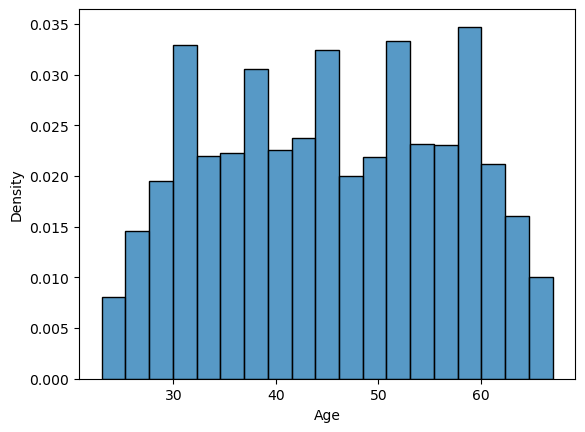

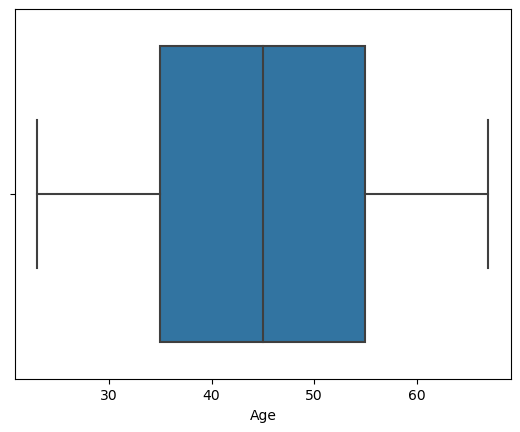

In [199]:
# review histogram of mortgage attributes
# Histogram and boxplot for Age
sns.histplot(data = df, x = 'Age', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Age')
plt.show()

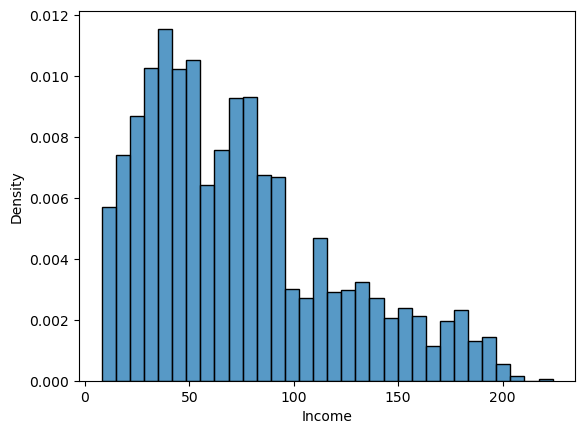

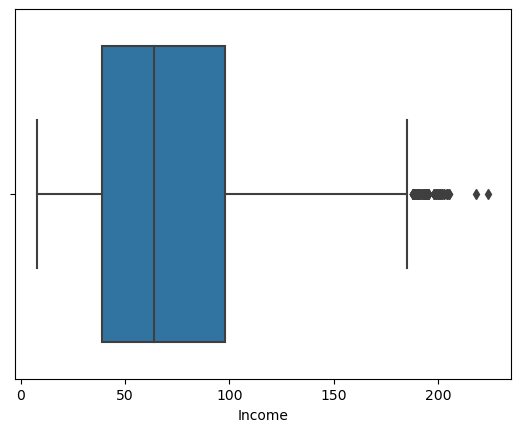

In [200]:
# review histogram of mortgage attributes
# histogram and boxplot for Income
sns.histplot(data = df, x = 'Income', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Income')
plt.show()

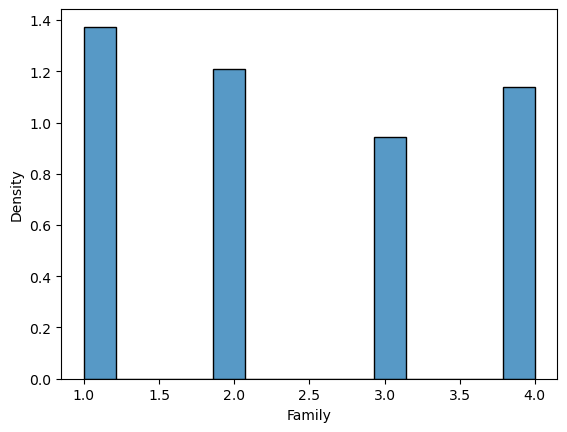

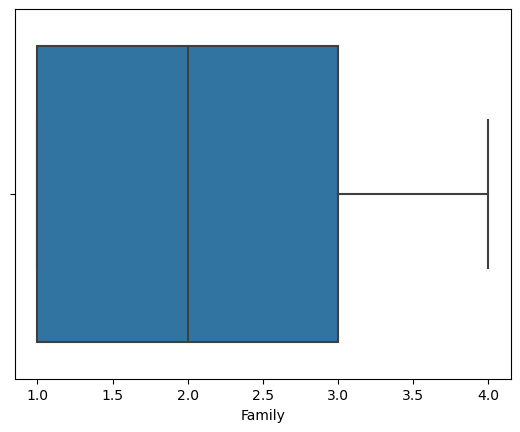

In [201]:
# review histograms of mortgage attributes
# histogram and boxplot for Family
sns.histplot(data = df, x = 'Family', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Family')
plt.show()

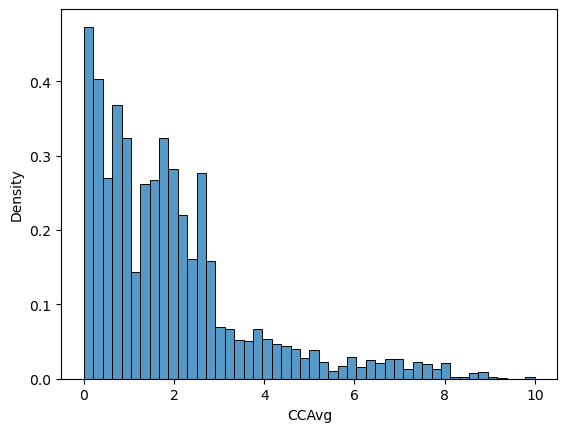

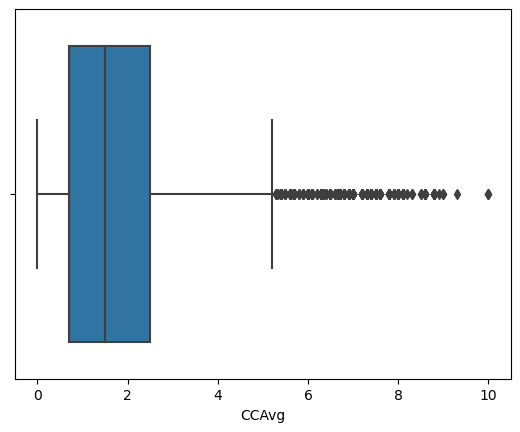

In [202]:
# review histograms of mortgage attributes
# histogram and boxplot for CCAvg
sns.histplot(data = df, x = 'CCAvg', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'CCAvg')
plt.show()

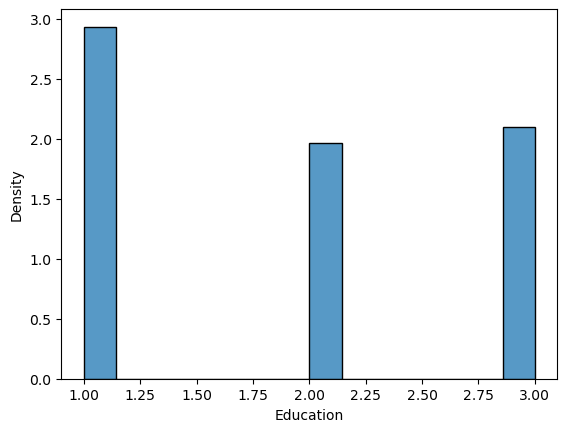

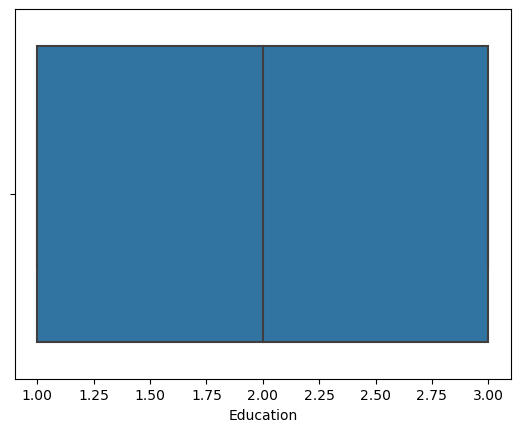

In [203]:
# review histograms of mortgage attributes
# histogram and boxplot for Education
sns.histplot(data = df, x = 'Education', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Education')
plt.show()

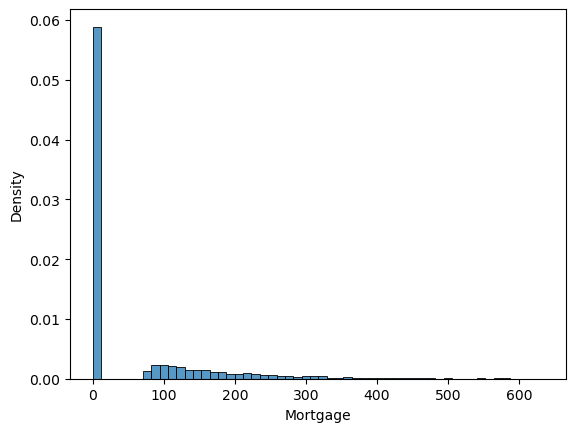

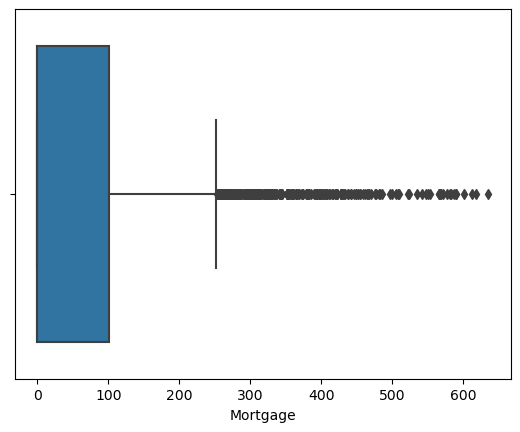

In [204]:
# review histograms of mortgage attributes
# histogram and boxplot for Mortgage
sns.histplot(data = df, x = 'Mortgage', stat = 'density')
plt.show()
sns.boxplot(data = df, x = 'Mortgage')
plt.show()

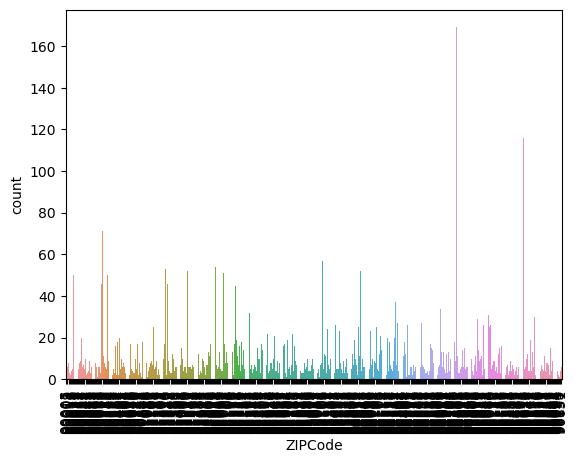

In [205]:
# investigate if there are patterns with ZipCode
sns.countplot(data = df, x = 'ZIPCode')
plt.xticks(rotation = 90)
plt.show()

# if given additional time, it would be useful to group ZIPCodes by geo regions

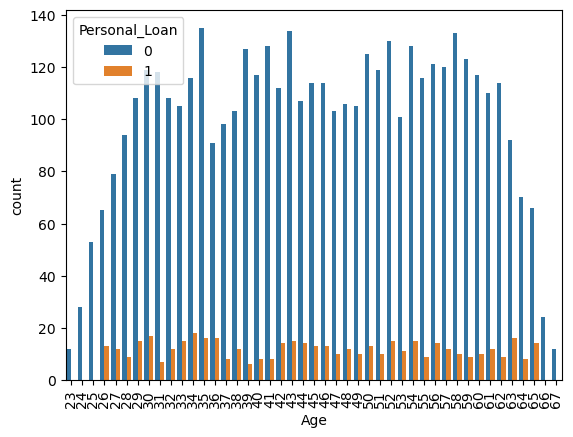

In [206]:
# look at age as it relates to Personal_Loan
sns.countplot(data = df, x = 'Age', hue = 'Personal_Loan')
plt.xticks(rotation = 90)
plt.show()

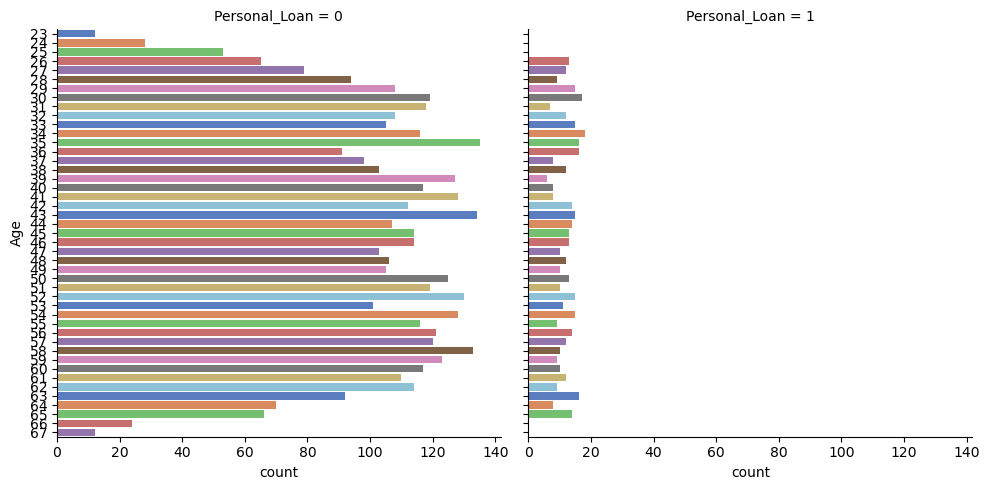

In [207]:
# run catplot to understand age and Personal Loan relationship
sns.catplot(data = df,  col = 'Personal_Loan', y = 'Age',
            kind = 'count', palette = 'muted')
plt.show()

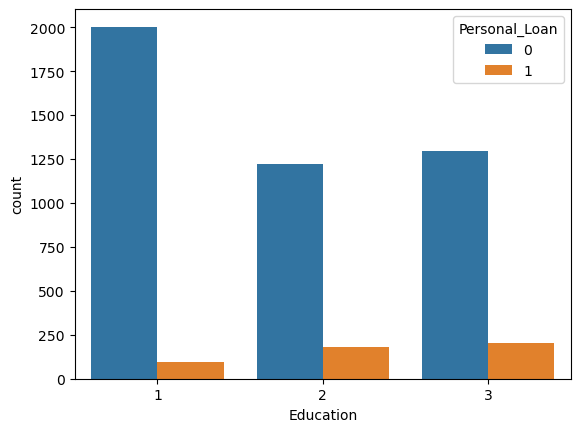

In [208]:
# look at age as it relates to Personal_Loan
sns.countplot(data = df, x = 'Education', hue = 'Personal_Loan')
plt.show()

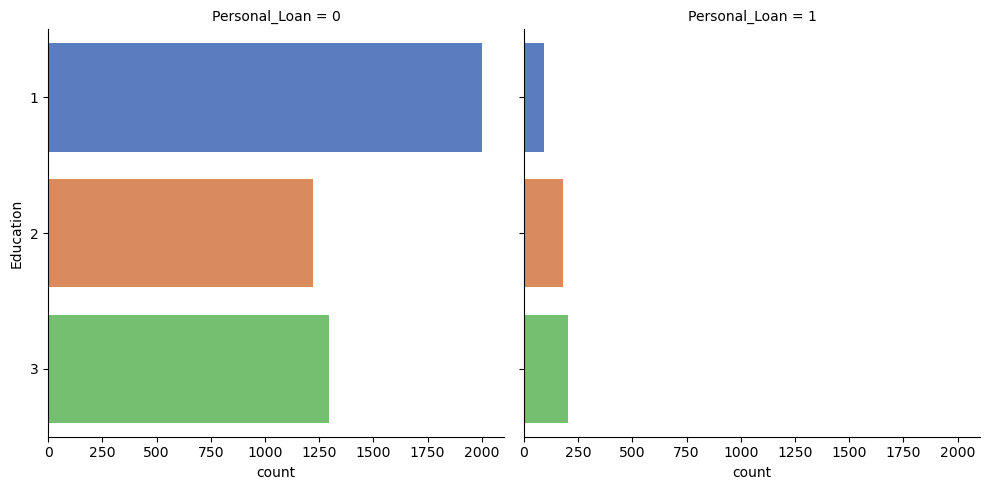

In [209]:
# run catplot to understand Education and Personal Loan relationship
sns.catplot(data = df,  col = 'Personal_Loan', y = 'Education',
            kind = 'count', palette = 'muted')
plt.show()

In [210]:
# Count the number of customers with Credit Cards
# Count this by looking at monthly credit card spending > 0
print(f"Number of customers with credit cards: {len(df[df['CCAvg'] > 0])}.") 

# Check some value counts of a few features: CreditCard
print(f"\nCustomers with credit cards from 3rd party lenders: {len(df[df['CreditCard'] == 1])}\n")

Number of customers with credit cards: 4894.

Customers with credit cards from 3rd party lenders: 1470



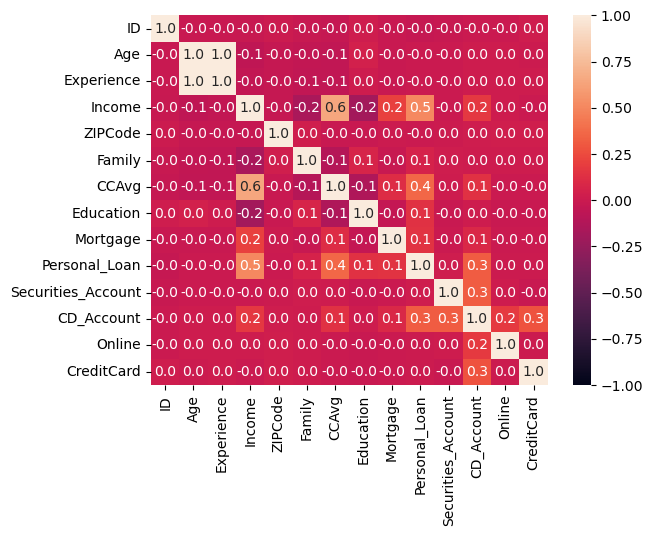

In [211]:
# investigate correlations between features
df.corr()

# display heatmap
sns.heatmap(data = df.corr(),
           annot = True,
           vmin = -1.0,
           vmax = 1.0,
           fmt = '0.1f')
plt.show()

## Data Preprocessing

* Missing value treatment
    * There are null or missing values in the data
* Feature engineering (if needed)
    * Remove ID
    * Remove ZIPCode
* Outlier detection and treatment (if needed)
    * Scale data with Outliers
    * CCAvg, Income, and Mortgage
    * Also scale Age and Experience
* Preparing data for modeling
    * Drop Personal_Loan (it is the dependent variable), Copy to y.
    * Copy remaining features into X.
* Any other preprocessing steps (if needed)

In [212]:
# remove the Customer ID column
if 'ID' in df.columns:
    df = df.drop(['ID'], axis = 1)

# remove ZIPCode - Unable to discern pattern
if 'ZIPCode' in df.columns:
    df = df.drop(['ZIPCode'], axis = 1)

# run head to verify the column has been removed
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [213]:
# CCAvg, Income, and Mortgage should be scaled
# Create a Scaler
std_scaler = StandardScaler()

# standardize Age
if 'Age' in df.columns:
    df['Age_std'] = std_scaler.fit_transform(df[['Age']])

# standardize Experience
if 'Experience' in df.columns:
    df['Experience_std'] = std_scaler.fit_transform(df[['Experience']])

# standardize CCAvg
if 'CCAvg' in df.columns:
    df['CCAvg_std'] = std_scaler.fit_transform(df[['CCAvg']])

# standardize Income
if 'Income' in df.columns:
    df['Income_std'] = std_scaler.fit_transform(df[['Income']])

# standardize Mortgage
if 'Mortgage' in df.columns:
    df['Mortgage_std'] = std_scaler.fit_transform(df[['Mortgage']])

# Drop non-standardized columns
if 'CCAvg' in df.columns:
    df.drop(['CCAvg'], axis = 1, inplace = True)
    
if 'Income' in df.columns:
    df.drop(['Income'], axis = 1, inplace = True)
    
if 'Mortgage' in df.columns:
    df.drop(['Mortgage'], axis = 1, inplace = True)
    
if 'Age' in df.columns:
    df.drop(['Age'], axis = 1, inplace = True)
    
if 'Experience' in df.columns:
    df.drop(['Experience'], axis = 1, inplace = True)
    
# re-run head to ensure we have standardized values
df.head()


,Family,Education,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Age_std,Experience_std,CCAvg_std,Income_std,Mortgage_std
0,4,1,0,1,0,0,0,-1.774417,-1.666078,-0.193385,-0.538229,-0.555524
1,3,1,0,1,0,0,0,-0.029524,-0.096330,-0.250611,-0.864109,-0.555524
2,1,1,0,0,0,0,0,-0.552992,-0.445163,-0.536736,-1.363793,-0.555524
3,1,2,0,0,0,0,0,-0.901970,-0.968413,0.436091,0.569765,-0.555524
4,4,2,0,0,0,0,1,-0.901970,-1.055621,-0.536736,-0.625130,-0.555524


## Split Data

In [214]:
# copy all features but Personal_Loan to the X variable
if 'Personal_Loan' in df.columns:
    X = df.drop("Personal_Loan", axis = 1)
    y = df.pop("Personal_Loan")

# run train_test_split to generate training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 1)

## Model Building

### Model Evaluation Criterion

* Accuracy
* Recall
* Precision


### Model Building: Logistic Regression

In [215]:
# Fit model on train
model_log = LogisticRegression(solver = 'liblinear', random_state = 1)
model_log.fit(X_train, y_train)

# run prediction against test
y_pred = model_log.predict(X_test)

model_score = round(model_log.score(X_test, y_test), 3)
print(f"Accuracy for Logistic Regression: {model_score}.")
print('Recall for Logistic Regression: %.3f' % recall_score(y_test, y_pred))
# score precision
print('Precision for Logistic Regression: %.3f' % precision_score(y_test, y_pred))

coef_df = pd.DataFrame(model_log.coef_)
coef_df['intercept'] = model_log.intercept_
print(coef_df)

Accuracy for Logistic Regression: 0.947.
Recall for Logistic Regression: 0.570
Precision for Logistic Regression: 0.850
          0         1         2         3         4         5         6   
0  0.544396  1.347344 -0.909817  3.172195 -0.610623 -0.999467 -0.140486  \

         7         8         9        10  intercept  
0  0.18179  0.271945  2.081906  0.073105  -7.475205  


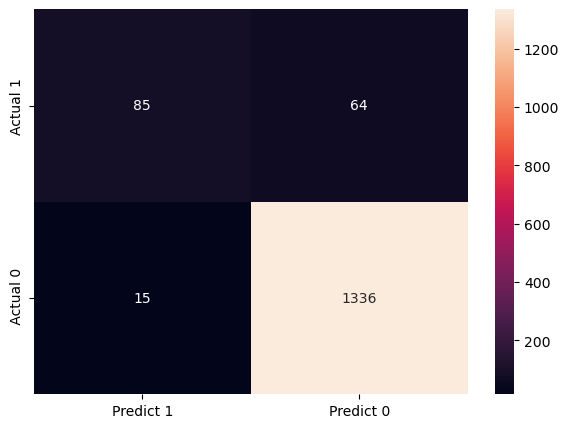

In [216]:
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### Model Performance Improvement: Logistic Regression

In [217]:
# use gridsearchcv to select hyperparameters and tune
import warnings
warnings.filterwarnings('ignore')


# parameter grid
parameters = {
    'penalty': ['l1', 'l2'],
    'C': np.linspace(1.0, 10.0, num = 20),
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# try different hyperparameters using gridsearchcv
model_reg2 = LogisticRegression(random_state = 1)
clf = GridSearchCV(model_reg2, param_grid = parameters,
                  scoring = 'accuracy',
                  cv = 10)

# fit the model
clf.fit(X_train, y_train)

# print best hyperparameters
print("Tuned Hyperparameters :", clf.best_params_)
print("Accuracy :",clf.best_score_)

# predict
#y_pred = clf.predict(X_test)

model_score = round(clf.score(X_test, y_test), 3)
#print(f"Accuracy for Logistic Regression: {model_score}.")
#print('Recall for Logistic Regression: %.3f' % recall_score(y_test, y_pred))

Tuned Hyperparameters : {'C': 3.3684210526315788, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy : 0.9517142857142857


Accuracy for Logistic Regression: 0.949.
Recall for Logistic Regression: 0.591
Precision for Logistic Regression: 0.846
          0         1         2         3        4         5         6   
0  0.715878  1.695939 -1.127865  3.771499 -0.61504 -1.138556 -0.113704  \

          7         8         9        10  intercept  
0  0.173245  0.296631  2.439618  0.077454  -9.081034  


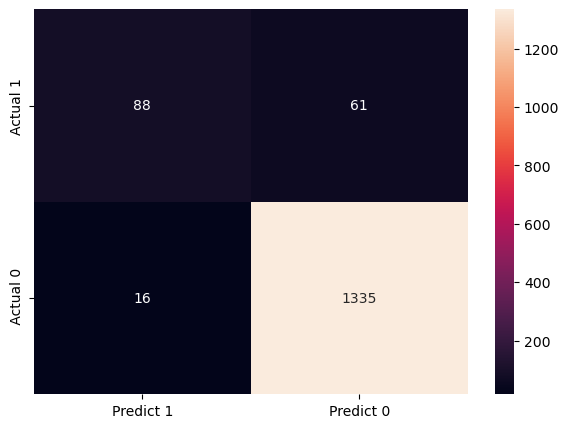

In [218]:
# run logistic regression with best hyperparameters
model_reg2 = LogisticRegression(C = 3.3684210526315788, penalty = 'l1',
                               solver = 'liblinear', random_state = 1)


# fit the model
model_reg2.fit(X_train, y_train)

# predict
y_pred = model_reg2.predict(X_test)

model_score = round(model_reg2.score(X_test, y_test), 3)
print(f"Accuracy for Logistic Regression: {model_score}.")
print('Recall for Logistic Regression: %.3f' % recall_score(y_test, y_pred))
# score precision
print('Precision for Logistic Regression: %.3f' % precision_score(y_test, y_pred))

coef_df = pd.DataFrame(model_reg2.coef_)
coef_df['intercept'] = model_reg2.intercept_
print(coef_df)

# display confusion matrix for tuned Log regression model
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

### Model Building: Decision Tree

In [219]:
# build a decision tree
dTree = DecisionTreeClassifier(random_state=1)

# fit the model
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

Accuracy for Decision Tree: 0.979.
Recall for Decision Tree: 0.879
Precision for Decision Tree: 0.910


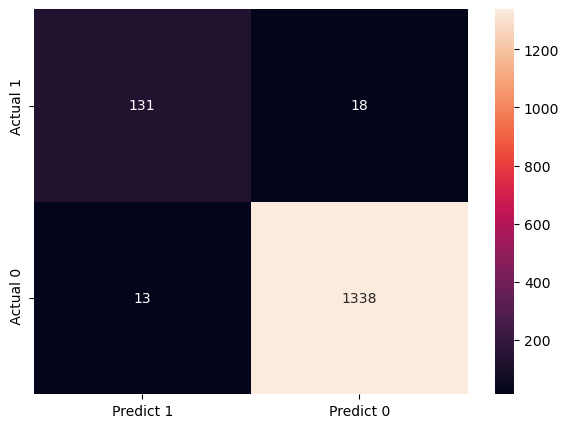

In [182]:
# Score accuracy 
dTree_acc = round(dTree.score(X_test, y_test), 3)
print(f"Accuracy for Decision Tree: {dTree_acc}.")

# predict using X_test
y_pred = dTree.predict(X_test)

# score and print recall
print('Recall for Decision Tree: %.3f' % recall_score(y_test, y_pred))

# score precision
print('Precision for Decision Tree: %.3f' % precision_score(y_test, y_pred))

# display confusion matrix for tuned Log regression model
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

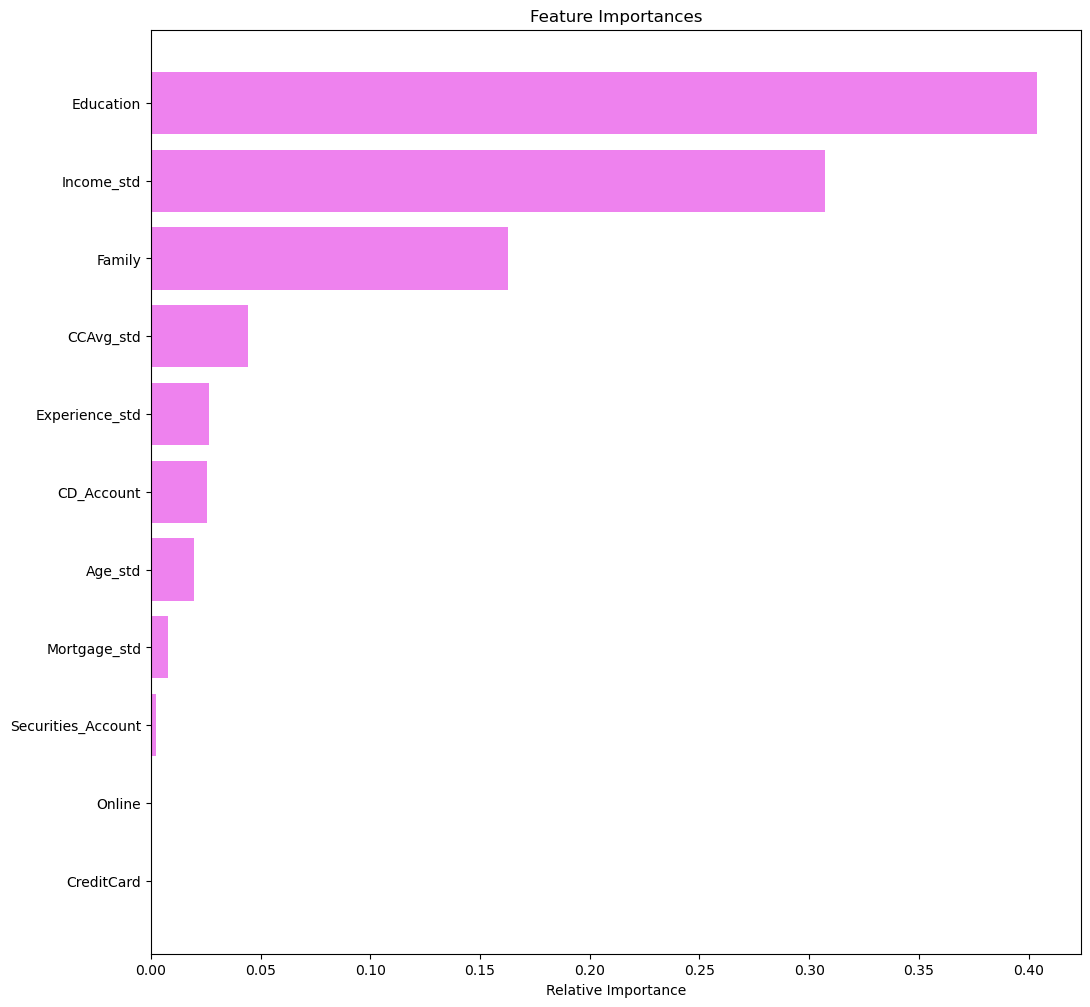

In [220]:
# Understand importance of features on whether customers take out Personal Loan
feature_names = list(X.columns)

importances = dTree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Model Performance Improvement: Decision Tree

In [221]:
# run gridsearchcv to identify best hyperparameter values
# Choose the type of classifier. 
model_dt = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {'max_depth': [5,10, 15, None], 
              
              'splitter': ['best', 'random'],
              'criterion': ['gini', 'entropy']
             }


# identify how the compare running the model
recall_scorer = metrics.make_scorer(metrics.recall_score)

# Run grid search for best hyperparameters
grid_obj = GridSearchCV(model_dt, parameters, scoring = recall_scorer, cv = 3)

# fit the model 
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to best combination of parameters
model_dt = grid_obj.best_estimator_

# fit with best algorithm to the data
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)

Accuracy for Decision Tree: 0.979.
Recall for Decision Tree: 0.866
Precision for Decision Tree: 0.921


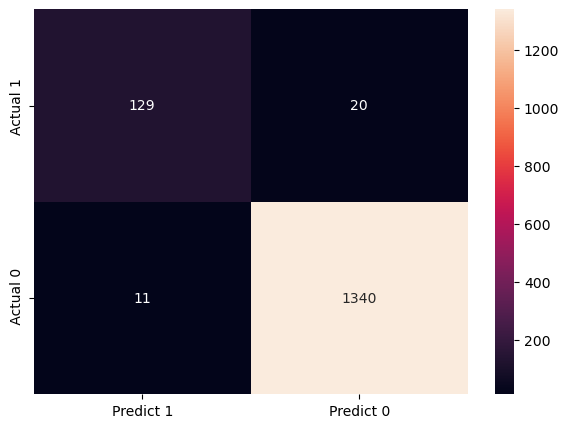

In [222]:
# run predictions using the fit model
y_pred = model_dt.predict(X_test)

# score the model
# Score accuracy 
model_dt_acc = round(dTree.score(X_test, y_test), 3)
print(f"Accuracy for Decision Tree: {model_dt_acc}.")

# score recall
print('Recall for Decision Tree: %.3f' % recall_score(y_test, y_pred))

# score precision
print('Precision for Decision Tree: %.3f' % precision_score(y_test, y_pred))

# display confusion matrix for tuned Log regression model
cm=metrics.confusion_matrix(y_test, y_pred, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1"," Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')
plt.show()

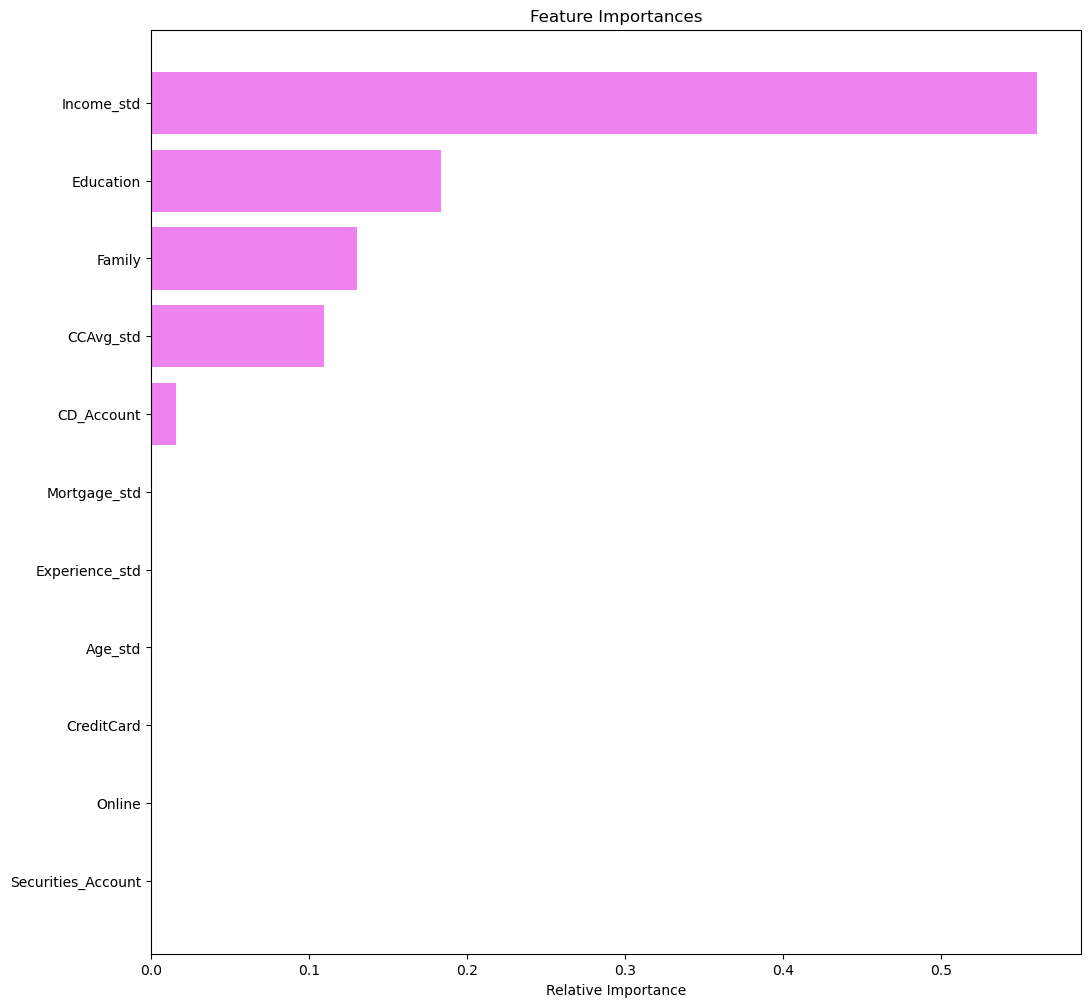

In [223]:
# re-run feature importances to feed recommendations
# Understand importance of features on whether customers take out Personal Loan
feature_names = list(X.columns)

importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

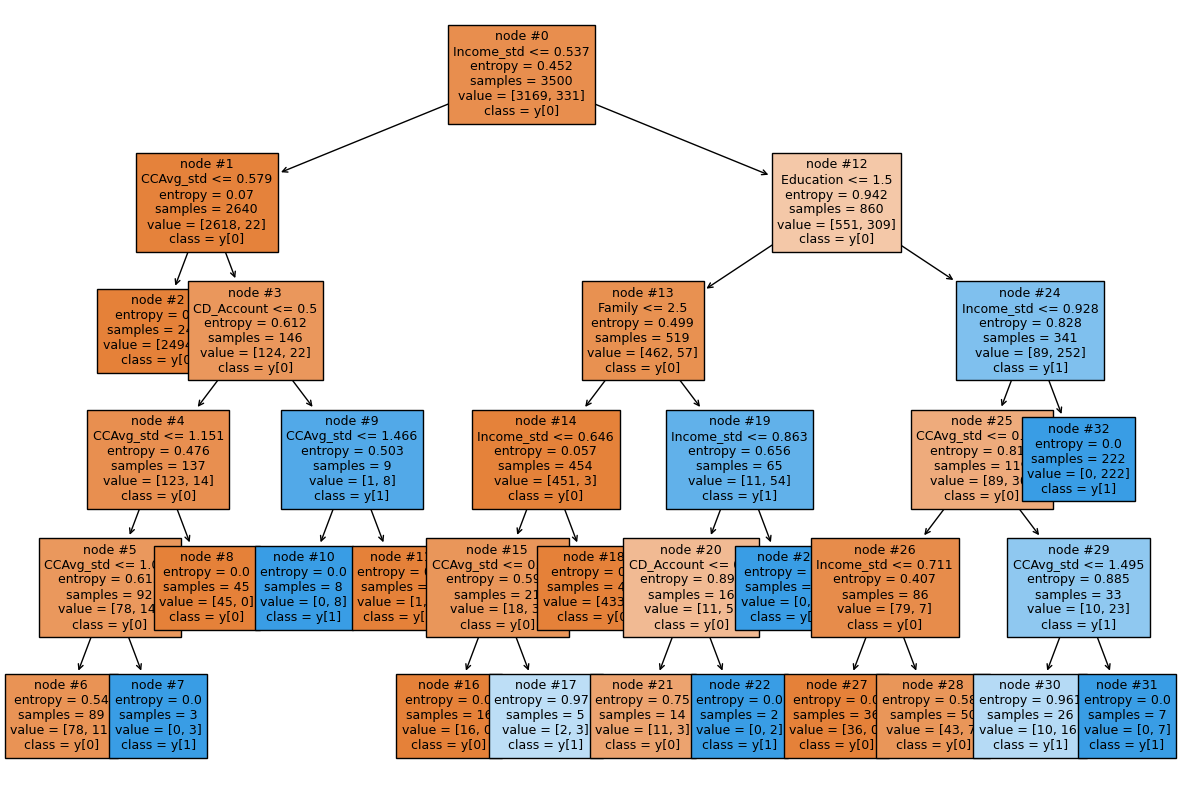

In [224]:
plt.figure(figsize=(15,10))


tree.plot_tree(model_dt,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [227]:

# reverse standardization of Income
df1 = pd.read_csv('datasets/Loan_Modeling.csv')

# calculate the mean
mean = sum(df1['Income']) / len(df1['Income'])
    
    # calculate the variance
var = sum((val - mean)**2 for val in df1['Income']) / len(df1['Income'])
    
    # calculate standard deviation
std = var ** 0.5
    
    # apply it to the prediction
real_val = 0.537 * std + mean
    
real_val

98.49184051054588

## Model Comparison and Final Model Selection

* Logistic regression (untuned):
    * Accuracy for Logistic Regression: 0.947.
    * Recall for Logistic Regression: 0.570
    * Precision for Logistic Regression: 0.850
    
* Logistic regression with tuned hyperparameters:
    * Accuracy for Logistic Regression: 0.949.
    * Recall for Logistic Regression: 0.591
    * Precision for Logistic Regression: 0.846
    
* Decision tree (untuned):
    * Accuracy for Decision Tree: 0.979.
    * Recall for Decision Tree: 0.879
    * Precision for Decision Tree: 0.910
    
* Decision tree with tuned hyperparameters:
    * Accuracy for Decision Tree: 0.979.
    * Recall for Decision Tree: 0.866
    * Precision for Decision Tree: 0.921
    
    
### Best Model - Decision Tree with tuned hyperparameters
* Decision tree outperforms logistic regression and lends itself to business recommendations
* While the untuned Decision tree model outperforms the tuned in terms of recall, the risk of overfitting is reduced through tuning
* Additionally, there are overlaps in attributable features

## Actionable Insights and Business Recommendations


1. Leverage the tuned version of the Decision tree model moving forward
2. Engage the marketing team to initiate a second campaign:
    * Income is the primary driver for the tuned decision tree model
    * The break point in the model is 98k for income
    * Market to customers who make greater than 98,000 a year
    * Education, multi-family household also contribute to taking out a personal loan, but income drives the most
    * Target educated inviduals who make above 98,000
3. Addtionally, customers with Certificates of Deposit tend to take out personal loans
    * Engage the marketing team that owns Certificates of Deposit
    * When customers engage the bank to invest in a CD, market personal loans along with Certificates of Deposit



___